In [1]:
!pip install dgl 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 26.1 MB/s eta 0:00:00


In [2]:
#pip install --upgrade torch dgl

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import dask.dataframe as dd

import time
import os
import tqdm
import math
import socket
import struct
import random

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import dgl.nn as dglnn
import dgl.function as fn
from dgl import from_networkx
import networkx as nx

import torch as th
import torch.nn as nn
import torch.nn.functional as F

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import category_encoders as ce

import seaborn as sns
import matplotlib.pyplot as plt

residual=True
multi_class = True
with_sort_timestamp = False
sequence_length = 3
with_cross_validation = True
cross_validation_splits_num = 5
local_epochs = 1
batch_size = 128
learning_rate = 0.001
LAMBD_1 = 0.0001
LAMBD_2 = 0.001
n_rounds = 20

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cic-ids-2017/cic_ids_2017.parquet
/kaggle/input/nf-ton-iot-modified/NF-ToN-IoT-v2-Modified.pkl
/kaggle/input/ccd-inid-modified/CCD-INID-Modified.pkl
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge_IIoTset__DatasetFL.pdf
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Readme.txt
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/MITM (ARP spoofing + DNS) Attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-i

In [4]:
#name ='nf-bot-iot'
name='nf-bot-iotv2'
#name ='edge-iiot'
#name ='cic-ids-2017'
#name ='cic-ton-iot'
#name ='nf-cse-cic-ids2018'
#name ='nf-uq-nids'
#name ='x-iiot'

#name ='cic-ton-iot-modified'
#name ='nf-ton-iotv2-modified'
#name ='ccd-inid-modified'
#name ='nf-uq-nids-modified'


# ***** > IF MODIFIED DATASET:


In [5]:
if name =='nf-uq-nids-modified' or name =='ccd-inid-modified' or name =='nf-ton-iotv2-modified' or name =='cic-ton-iot-modified':
    import zipfile
    import os

# Path to your ZIP file
    #zip_file_path = '/kaggle/input/ccd-inid-modified/CCD-INID-Modified.pkl'
    #zip_file_path = '/kaggle/input/cic-ton-iot-modified/CIC-ToN-IoT-Modified.pkl'
    zip_file_path = '/kaggle/input/nf-ton-iot-modified/NF-ToN-IoT-v2-Modified.pkl'
    #zip_file_path = '/kaggle/input/nf-uq-nids-modified/NF-UQ-NIDS-Modified.pkl'

# Directory to extract to
    extract_dir = '/kaggle/working/extracted_files/'

# Ensure the directory exist
    os.makedirs(extract_dir, exist_ok=True)

    try:
    # Open the ZIP file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents into the directory
            zip_ref.extractall(extract_dir)
        print("Extraction successful.")
    except zipfile.BadZipFile:
        print("Error: The file is not a ZIP file or it is corrupted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [6]:
if name =='nf-uq-nids-modified' or name =='ccd-inid-modified' or name =='nf-ton-iotv2-modified' or name =='cic-ton-iot-modified':
    import pandas as pd
    import os

# Path to the extracted .pkl file
# Update this path to the actual .pkl file found inside the ZIP archive
    #pkl_file_path = os.path.join(extract_dir, 'CCD-INID-Modified.pkl')
    #pkl_file_path = os.path.join(extract_dir, 'CIC-ToN-IoT-Modified.pkl')
    pkl_file_path = os.path.join(extract_dir, 'NF-ToN-IoT-v2-Modified.pkl')
    #pkl_file_path = os.path.join(extract_dir, 'NF-UQ-NIDS-Modified.pkl')

    try:
    # Load the DataFrame from the .pkl file
        df = pd.read_pickle(pkl_file_path)
    except FileNotFoundError:
        print(f"The file {pkl_file_path} was not found.")
    except pd.errors.PickleError:
        print("Error occurred while reading the pickle file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

* * * * 

In [7]:
#df


In [8]:
#df = pd.read_parquet("/kaggle/input/nfbotiot/NF-BoT-IoT.parquet")
#df=pd.read_csv("/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv")
#df = pd.read_parquet("/kaggle/input/cic-ids-2017/cic_ids_2017.parquet")
#df = pd.read_parquet("/kaggle/input/cic-ton-iot")
#df = pd.read_parquet("/kaggle/input/nf-cse-cic-ids2018")
#df = pd.read_parquet("/kaggle/input/nf-uq-nids")
#df = pd.read_csv("/kaggle/input/x-iiotid-dataset/X-IIoTID dataset.csv")
df=pd.read_parquet("/kaggle/input/nfbotiotv2/NF-BoT-IoT-V2.parquet")

In [9]:
#for column in df.columns:
 #   df[column] = pd.Categorical(df[column])
  #  print(df[column])

In [10]:
#import pandas as pd

# Assuming your DataFrame is named 'df'
#zero_columns = df.columns[(df == 0).all()].tolist()

#print("Columns with all zero values:", zero_columns)
#print("Number of such columns:", len(zero_columns))

In [11]:
#df['server_fingerprint'] = pd.Categorical(df['server_fingerprint'])
#print(df['server_fingerprint'])

In [12]:
df = df.sample(frac=0.1, random_state=42)  # 10% sample, random_state for reproducibility

In [13]:
#df.fillna(0, inplace=True)

In [14]:
df

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
4403285,-9476,3918,6,0.0,44,1,40,1,22,2,...,1024,0,0,0,0,0,0,0.0,1,Reconnaissance
29734310,-7567,80,17,188.0,112,4,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1,DDoS
20818688,18865,80,6,7.0,280,2,0,0,2,2,...,512,0,35840,140,0,0,0,0.0,1,DoS
16115142,744,80,17,188.0,56,2,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1,DDoS
18374675,-11539,80,17,188.0,56,2,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402005,9099,80,6,7.0,420,3,0,0,2,2,...,512,0,0,0,0,0,0,0.0,1,DoS
20684072,-12894,80,6,7.0,280,2,40,1,22,2,...,512,0,0,0,0,0,0,0.0,1,DoS
6165799,-27831,80,6,7.0,280,2,0,0,2,2,...,512,0,0,0,0,0,0,0.0,1,DoS
11024924,21771,80,6,7.0,280,2,0,0,2,2,...,512,0,0,0,0,0,0,0.0,1,DoS


In [15]:
if name=='x-iiot':

   # List of columns to convert to categorical
    columns_to_convert = [
          'Protocol', 'Service', 'is_syn_only', 'Is_SYN_ACK', 
           'is_pure_ack', 'is_with_payload', 'FIN or RST', 
        'Bad_checksum', 'is_SYN_with_RST', 'anomaly_alert']

# Function to convert a column to categorical and return its codes
    def to_categorical_codes(column):
        return pd.Categorical(column).codes

# Apply the transformation to each specified column
    for col in columns_to_convert:
        if col in df.columns:
            df[col] = to_categorical_codes(df[col])
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame")
    df['class3'] = (df['class3'] == 'Attack').astype(int)
    df = df.applymap(lambda x: 0 if x == '-' else x)
    df = df.applymap(lambda x: 0 if x == '?' else x)
    df = df.applymap(lambda x: 0 if x == '#DIV/0!' else x)    
    df = df.applymap(lambda x: 0 if x == 'excel' else x)
    df = df.applymap(lambda x: 0 if x == 'aza' else x)
    df = df.applymap(lambda x: 0 if x == ' ' else x)
if name=='edge-iiot':
     # List of columns to convert to categorical
    columns_to_convert = ['mqtt.protoname','mqtt.topic','mqtt.conack.flags','mqtt.msg','http.request.method','dns.qry.name.len','arp.src.proto_ipv4',
                          'http.request.full_uri','http.file_data','http.request.version','arp.dst.proto_ipv4','http.request.uri.query','tcp.srcport','http.referer']

# Function to convert a column to categorical and return its codes
    def to_categorical_codes(column):
        return pd.Categorical(column).codes

# Apply the transformation to each specified column
    for col in columns_to_convert:
        if col in df.columns:
            df[col] = to_categorical_codes(df[col])
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame")
    
if name=='ccd-inid-modified':    
  # List of columns to convert to categorical
    columns_to_convert = ['splt_direction','splt_ps','splt_piat_ms','application_name','application_category_name','requested_server_name','client_fingerprint']

# Function to convert a column to categorical and return its codes
    def to_categorical_codes(column):
        return pd.Categorical(column).codes

# Apply the transformation to each specified column
    for col in columns_to_convert:
        if col in df.columns:
            df[col] = to_categorical_codes(df[col])
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame")
    df['traffic_type'] = (df['traffic_type'] == 'attack').astype(int)
    

In [16]:

#print(X_train[cols_to_norm].dtypes)

In [17]:
#df = df.applymap(lambda x: 0 if x == '-' else x)

In [18]:
#df = df.applymap(lambda x: 0 if x == '?' else x)

In [19]:
#df = df.applymap(lambda x: 0 if x == '#DIV/0!' else x)

In [20]:
#df = df.applymap(lambda x: 0 if x == 'excel' else x)

In [21]:
#df = df.applymap(lambda x: 0 if x == 'aza' else x)

In [22]:
#df = df.applymap(lambda x: 0 if x == ' ' else x)

In [23]:
df

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
4403285,-9476,3918,6,0.0,44,1,40,1,22,2,...,1024,0,0,0,0,0,0,0.0,1,Reconnaissance
29734310,-7567,80,17,188.0,112,4,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1,DDoS
20818688,18865,80,6,7.0,280,2,0,0,2,2,...,512,0,35840,140,0,0,0,0.0,1,DoS
16115142,744,80,17,188.0,56,2,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1,DDoS
18374675,-11539,80,17,188.0,56,2,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402005,9099,80,6,7.0,420,3,0,0,2,2,...,512,0,0,0,0,0,0,0.0,1,DoS
20684072,-12894,80,6,7.0,280,2,40,1,22,2,...,512,0,0,0,0,0,0,0.0,1,DoS
6165799,-27831,80,6,7.0,280,2,0,0,2,2,...,512,0,0,0,0,0,0,0.0,1,DoS
11024924,21771,80,6,7.0,280,2,0,0,2,2,...,512,0,0,0,0,0,0,0.0,1,DoS


In [24]:
if name =='x-iiot':
    drop_columns=["Scr_IP","Scr_port","Des_IP","Des_port","Timestamp","Date","class1","class2"]
    src_ip_col="Scr_IP"
    src_port_col="Scr_port"
    dst_ip_col="Des_IP"
    dst_port_col="Des_port"
    label_col="class3"
    class_col="class2"
if name=='edge-iiot':
    drop_columns=["ip.src_host", "ip.dst_host","tcp.options","tcp.payload","mqtt.msg,icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as","frame.time","Attack_type"]
    src_ip_col="ip.src_host"
    dst_ip_col="ip.dst_host"    
    label_col="Attack_label"
    class_col= "Attack_type"
    
if name=='cic-ids-2017' or name == 'cic-ton-iot':
    drop_columns=["Flow ID", "Src IP", "Dst IP", "Timestamp", "Src Port", "Dst Port", "Attack"]    
    src_ip_col="Src IP"
    src_port_col="Src Port"
    dst_ip_col="Dst IP"
    dst_port_col="Dst Port"
    timestamp_col="Timestamp"
    timestamp_format="%d/%m/%Y %I:%M:%S %p"
    label_col="Label"
    class_col="Attack"
    class_num_col= "Class"
    weak_columns = ['Flow Duration', 'Tot Bwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean',
              'Flow IAT Max', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Active Mean', 'Idle Mean']
    
if name=='nf-bot-iot' or name == 'nf-cse-cic-ids2018' or name=='nf-bot-iotv2':
    drop_columns=["L4_SRC_PORT","L4_DST_PORT","Attack"]
    src_port_col="L4_SRC_PORT"
    dst_port_col="L4_DST_PORT"
    label_col="Label"
    class_col="Attack"
if name=='nf-uq-nids':
    drop_columns=["L4_SRC_PORT","L4_DST_PORT","Attack","Dataset"]
    src_port_col="L4_SRC_PORT"
    dst_port_col="L4_DST_PORT"
    label_col="Label"
    class_col="Attack"
if name=='cic-ton-iot-modified':
    drop_columns=["Flow ID", "Src IP", "Dst IP", "Timestamp", "Src Port", "Dst Port", "Attack","datetime"]    
    src_ip_col="Src IP"
    src_port_col="Src Port"
    dst_ip_col="Dst IP"
    dst_port_col="Dst Port"
    timestamp_col="Timestamp"
    timestamp_format="%d/%m/%Y %I:%M:%S %p"
    label_col="Label"
    class_col="Attack"
    weak_columns = ["Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags", "URG Flag Cnt", "CWE Flag Count", "ECE Flag Cnt", "Fwd Byts/b Avg", "Fwd Pkts/b Avg", "Fwd Blk Rate Avg", "Subflow Bwd Pkts"]
if name=='ccd-inid-modified':
    drop_columns=["id","src_ip","src_port","dst_ip","dst_port","atk_type"]    
    src_ip_col="src_ip"
    src_port_col="src_port"
    dst_ip_col="dst_ip"
    dst_port_col="dst_port"
    label_col="traffic_type"
    class_col="atk_type"
    weak_columns = ["vlan_id","user_agent","server_fingerprint","content_type", "bidirectional_cwr_packets", "bidirectional_ece_packets", "bidirectional_urg_packets", "src2dst_cwr_packets", "src2dst_ece_packets", "src2dst_urg_packets", "dst2src_cwr_packets", "dst2src_ece_packets", "dst2src_urg_packet"]
if name=='nf-ton-iotv2-modified':
    drop_columns=["IPV4_SRC_ADDR","L4_SRC_PORT","IPV4_DST_ADDR","L4_DST_PORT","Attack","SRC_TO_DST_AVG_THROUGHPUT","DST_TO_SRC_AVG_THROUGHPUT","FLOW_DURATION_MILLISECONDS","LONGEST_FLOW_PKT","SRC_TO_DST_SECOND_BYTES", "DST_TO_SRC_SECOND_BYTES" ,"TCP_WIN_MAX_IN TCP_WIN_MAX_OUT"]     
    src_ip_col="IPV4_SRC_ADDR"
    src_port_col="L4_SRC_PORT"
    dst_ip_col="IPV4_DST_ADDR"
    dst_port_col="L4_DST_PORT"
    label_col="Label"
    class_col="Attack"
if name=='nf-uq-nids-modified':
    drop_columns=["IPV4_SRC_ADDR","L4_SRC_PORT","IPV4_DST_ADDR","L4_DST_PORT","Attack","Dataset"]    
    src_ip_col="IPV4_SRC_ADDR"
    src_port_col="L4_SRC_PORT"
    dst_ip_col="IPV4_DST_ADDR"
    dst_port_col="L4_DST_PORT"
    label_col="Label"
    class_col="Attack"    


In [25]:
#df

In [26]:
#df.Label.value_counts()

In [27]:
#df=df.sample(frac=0.1, random_state=42) 

In [28]:
if name == 'nf-bot-iot' or name =='nf-cse-cic-ids2018' or name == 'nf-uq-nids' or name=='nf-bot-iotv2':
    df[src_port_col] = df[src_port_col].apply(str)
    df[dst_port_col] = df[dst_port_col].apply(str)


if name == 'cic-ids-2017' or name =='cic-ton-iot' or name== 'x-iiot' or name=='cic-ton-iot-modified' or name=='ccd-inid-modified' or  name=='nf-ton-iotv2-modified' or name =='nf-uq-nids-modified' :
    df[src_ip_col] = df[src_ip_col].apply(str)
    df[src_port_col] = df[src_port_col].apply(str)
    df[dst_ip_col] = df[dst_ip_col].apply(str)
    df[dst_port_col] = df[dst_port_col].apply(str)
    
if name == 'edge-iiot':
    df[src_ip_col] = df[src_ip_col].apply(str)
    df[dst_ip_col] = df[dst_ip_col].apply(str)

In [29]:
# df[src_ip_col] = df[src_ip_col].apply(lambda x: socket.inet_ntoa(struct.pack('>I', random.randint(0xac100001, 0xac1f0001))))
# df.head()

In [30]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df.reset_index(drop=True, inplace=True)

In [31]:
# X = df.drop([label_col], axis=1)
y = df[label_col]
X_train, X_test, y_train, y_test = train_test_split(
        df, y, test_size=0.3, random_state=13, stratify=y)

In [32]:
if name== 'cic-ids-2017' or name == 'cic-ton-iot' or name=='cic-ton-iot-modified' or name=='ccd-inid-modified':
    cols_to_norm = list(set(list(X_train.iloc[:, 2:].columns ))  - set(list([label_col])) - set(drop_columns)  - set(weak_columns))
else:
    cols_to_norm = list(set(list(X_train.iloc[:, 2:].columns ))  - set(list([label_col])) - set(drop_columns))

In [33]:
scaler = StandardScaler()
X_train[cols_to_norm] = scaler.fit_transform(X_train[cols_to_norm])

In [34]:
X_train['h'] = X_train[ cols_to_norm ].values.tolist()

In [35]:
if name == 'nf-bot-iot' or name == 'nf-cse-cic-ids2018' or name == 'nf-uq-nids' or name=='nf-bot-iotv2':
    G = nx.from_pandas_edgelist(X_train, src_port_col, dst_port_col, ['h',label_col],create_using=nx.MultiDiGraph())
if name == 'x-iiot' or name == 'cic-ids-2017' or name == 'cic-ton-iot' or name == 'edge-iiot' or name=='cic-ton-iot-modified' or name=='ccd-inid-modified' or  name=='nf-ton-iotv2-modified' or name =='nf-uq-nids-modified':
    G = nx.from_pandas_edgelist(X_train, src_ip_col, dst_ip_col, ['h',label_col],create_using=nx.MultiDiGraph())

In [36]:
G = from_networkx(G,edge_attrs=['h',label_col] )

In [37]:
G.num_nodes()

65536

In [38]:
G.ndata['h'] = th.ones(G.num_nodes(), G.edata['h'].shape[1])

In [39]:
G.ndata['h'] = th.reshape(G.ndata['h'], (G.ndata['h'].shape[0], 1,G.ndata['h'].shape[1]))
G.edata['h'] = th.reshape(G.edata['h'], (G.edata['h'].shape[0], 1,G.edata['h'].shape[1]))

In [40]:
G.edata['train_mask'] = th.ones(len(G.edata['h']), dtype=th.bool)

In [41]:
class Model(nn.Module):
    def __init__(self, ndim_in, ndim_out, edim, activation, dropout,num_neighbors):
        super().__init__()
        self.gnn = SAGE(ndim_in, ndim_out, edim, activation, dropout,num_neighbors)
        self.pred = MLPPredictor(ndim_out,edim, 2)
    def forward(self, g, nfeats, efeats):
        h = self.gnn(g, nfeats, efeats)
        return self.pred(g, h)


In [42]:
class SAGELayer(nn.Module):
    def __init__(self, ndim_in, edims, ndim_out, activation,num_neighbors):
        super(SAGELayer, self).__init__()
        ### force to outut fix dimensions
        self.W_msg = nn.Linear(ndim_in + edims, ndim_out)
        ### apply weight
        self.W_apply = nn.Linear(ndim_in + ndim_out, ndim_out)
        self.activation = activation
        self.num_neighbors = num_neighbors

    def message_func(self, edges):
        
       
        return {'m': self.W_msg(th.cat([edges.src['h'], edges.data['h']], 2))}

    def forward(self, g_dgl, nfeats, efeats):
        with g_dgl.local_scope():
            g = g_dgl
           
            # Neighbor sampling
            sampled_g = dgl.sampling.sample_neighbors(g, g.nodes(), self.num_neighbors)
           
            # Set node and edge features for the sampled graph
            sampled_g.ndata['h'] = nfeats
            #print(nfeats.shape)
            
            sampled_eids = sampled_g.edata[dgl.EID]
           
            # Create new edge features for the sampled graph
            sampled_eids = sampled_g.edata[dgl.EID]
            sampled_g.edata['h'] = efeats[sampled_eids]
            
            sampled_g.update_all(self.message_func, fn.mean('m', 'h_neigh'))
                    
            h_new = F.relu(self.W_apply(th.cat([nfeats, sampled_g.ndata['h_neigh']], 2)))
            return h_new


class SAGE(nn.Module):
    def __init__(self, ndim_in, ndim_out, edim, activation, dropout,num_neighbors):
        super(SAGE, self).__init__()
        self.conv1 = SAGELayer(ndim_in, edim, 128, activation,num_neighbors)
        self.conv2 = SAGELayer(128, edim, ndim_out, activation,num_neighbors)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, g, nfeats, efeats):
        #for i, layer in enumerate(self.layers):
         #   if i != 0:
              #  nfeats = self.dropout(nfeats)
           # h_dst = x[:mfgs[0].num_dst_nodes()] 
        #edge_features=[]
        #node_features=[]
       # for node_idx in range (G.num_nodes()):
        #        neighbor_feats=extract_sampled_features(node_idx, s, G.edata['h'])
         #       edge_features.append(neighbor_feats)
        #for node_idx in range (G.num_nodes()):
         #   neighbor_feats=extract_sampled_features(node_idx, s, G.ndata['h'])
          #  node_features.append(neighbor_feats)
        nfeats = self.conv1(g, nfeats, efeats)
        #print("ok2")
        
        nfeats = self.conv2(g, nfeats,efeats)
            
            
        return nfeats.sum(1)

In [43]:
class MLPPredictor(nn.Module):
    def __init__(self, in_features,edim, out_classes):
        super().__init__()
        if residual:
            self.W = nn.Linear(in_features * 2 + edim, out_classes)
        else:
            self.W = nn.Linear(in_features * 2, out_classes)
    def apply_edges(self, edges):
        h_u = edges.src['h']
        
        h_v = edges.dst['h']
        if residual:
            h_uv = edges.data['h']
            h_uv = h_uv.view(h_uv.shape[0], h_uv.shape[2])
            score = self.W(th.cat([h_u, h_v, h_uv], 1))
        else:
            score = self.W(th.cat([h_u, h_v], 1))
            
        return {'score': score}

    def forward(self, graph, h):
        with graph.local_scope():
            graph.ndata['h'] = h
            graph.apply_edges(self.apply_edges)
            return graph.edata['score']

In [44]:
#G = G.to('cuda:0')
#G.device

In [45]:
#G.edata['h'].shape
G.ndata['h'].shape

torch.Size([65536, 1, 39])

In [46]:
G.ndata['h'].device

device(type='cpu')

In [47]:
G.edata['h'].device

device(type='cpu')

In [48]:
G.edata[label_col].cpu().numpy()

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes = np.unique(G.edata[label_col].cpu().numpy()),
                                                 y = G.edata[label_col].cpu().numpy())

In [50]:
# class_weights = th.FloatTensor(class_weights).cuda()
class_weights = th.FloatTensor(class_weights)

criterion = nn.CrossEntropyLoss(weight = class_weights)

In [51]:
def compute_accuracy(pred, labels):
    return (pred.argmax(1) == labels).float().mean().item()

In [52]:
##Testing 

#edge_features=[]
node_features = G.ndata['h']
edge_features=G.edata['h']
#edge_features = G.edata['h']
#for node_idx in range (G.num_nodes()):
 #   neighbor_feats=extract_sampled_features(node_idx, s, G.edata['h'])
  #  edge_features.append(neighbor_feats)
#print(edges_features) 
print('done')
edge_label = G.edata[label_col]
train_mask = G.edata['train_mask']

# model = Model(G.ndata['h'].shape[2], 128, G.ndata['h'].shape[2], F.relu, 0.2).cuda()
model = Model(G.ndata['h'].shape[2], 128, G.ndata['h'].shape[2], F.relu, 0.2,4)
opt = th.optim.Adam(model.parameters())
#for epoch in range(1,100):
pred = model(G, node_features,edge_features)
loss = criterion(pred[train_mask] ,edge_label[train_mask])
opt.zero_grad()
loss.backward()
opt.step()
  #  print('Epoch:', epoch ,' Training acc:', compute_accuracy(pred[train_mask], edge_label[train_mask]))
   # if epoch % 100 == 0:
    #    print('Epoch:', epoch ,' Training acc:', compute_accuracy(pred[train_mask], edge_label[train_mask]))

done


In [53]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model = model.to(device)



In [54]:
node_features = G.ndata['h']
edge_features = G.edata['h']

edge_label = G.edata[label_col]
train_mask = G.edata['train_mask']
learning_rate = 0.001
# model = Model(G.ndata['h'].shape[2], 128, G.ndata['h'].shape[2], F.relu, 0.2).cuda()
model = Model(G.ndata['h'].shape[2], 128, G.ndata['h'].shape[2], F.relu, 0.2,4)
opt = th.optim.Adam(model.parameters(),lr=learning_rate)


for epoch in range(1,100):
#     pred = model(G, node_features,edge_features).cuda()
    pred = model(G, node_features,edge_features)
    loss = criterion(pred[train_mask] ,edge_label[train_mask])
    opt.zero_grad()
    loss.backward()
    opt.step()
    print('Epoch:', epoch ,' Training acc:', compute_accuracy(pred[train_mask], edge_label[train_mask]))
    if epoch % 100 == 0:
        print('Epoch:', epoch ,' Training acc:', compute_accuracy(pred[train_mask], edge_label[train_mask]))

Epoch: 1  Training acc: 0.8542513847351074
Epoch: 2  Training acc: 0.9859519600868225
Epoch: 3  Training acc: 0.9836809039115906
Epoch: 4  Training acc: 0.9855795502662659
Epoch: 5  Training acc: 0.9828656315803528
Epoch: 6  Training acc: 0.9844407439231873
Epoch: 7  Training acc: 0.9821419715881348
Epoch: 8  Training acc: 0.9590364694595337
Epoch: 9  Training acc: 0.9552832841873169
Epoch: 10  Training acc: 0.9507858157157898
Epoch: 11  Training acc: 0.9500640034675598
Epoch: 12  Training acc: 0.9495051503181458
Epoch: 13  Training acc: 0.9495183229446411
Epoch: 14  Training acc: 0.9496065974235535
Epoch: 15  Training acc: 0.9497869610786438
Epoch: 16  Training acc: 0.9500429034233093
Epoch: 17  Training acc: 0.9508886337280273
Epoch: 18  Training acc: 0.9508510828018188
Epoch: 19  Training acc: 0.9516165256500244
Epoch: 20  Training acc: 0.9524735808372498
Epoch: 21  Training acc: 0.9555664658546448
Epoch: 22  Training acc: 0.9613239765167236
Epoch: 23  Training acc: 0.96784311532974

In [55]:
X_test[cols_to_norm] = scaler.transform(X_test[cols_to_norm])

In [56]:
X_test['h'] = X_test[ cols_to_norm ].values.tolist()

In [57]:
if name == 'nf-bot-iot' or name == 'nf-cse-cic-ids2018' or name == 'nf-uq-nids' or name=='nf-bot-iotv2':
    G_test= nx.from_pandas_edgelist(X_test, src_port_col, dst_port_col, ['h',label_col],create_using=nx.MultiDiGraph())
if name == 'x-iiot' or name == 'cic-ids-2017' or name == 'cic-ton-iot' or name == 'edge-iiot' or name=='cic-ton-iot-modified' or name=='ccd-inid-modified' or  name=='nf-ton-iotv2-modified' or name =='nf-uq-nids-modified':
    G_test = nx.from_pandas_edgelist(X_test, src_ip_col, dst_ip_col, ['h',label_col],create_using=nx.MultiDiGraph())

# G_test = G_test.to_directed()
G_test = from_networkx(G_test,edge_attrs=['h',label_col] )
actual = G_test.edata.pop(label_col)
G_test.ndata['feature'] = th.ones(G_test.num_nodes(),G.ndata['h'].shape[2])

In [58]:
G_test.ndata['feature'] = th.reshape(G_test.ndata['feature'], (G_test.ndata['feature'].shape[0], 1, G_test.ndata['feature'].shape[1]))
G_test.edata['h'] = th.reshape(G_test.edata['h'], (G_test.edata['h'].shape[0], 1, G_test.edata['h'].shape[1]))

In [59]:
# G_test = G_test.to('cuda:0')

In [60]:
import timeit
start_time = timeit.default_timer()
node_features_test = G_test.ndata['feature']
edge_features_test = G_test.edata['h']
# test_pred = model(G_test, node_features_test, edge_features_test).cuda()
test_pred = model(G_test, node_features_test, edge_features_test)
elapsed = timeit.default_timer() - start_time

In [61]:
print(str(elapsed) + ' seconds')

1.3443075700001827 seconds


In [62]:
test_pred = test_pred.argmax(1)
test_pred = th.Tensor.cpu(test_pred).detach().numpy()


In [63]:
actual = ["Normal" if i == 0 else "Attack" for i in actual]
test_pred = ["Normal" if i == 0 else "Attack" for i in test_pred]

In [64]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

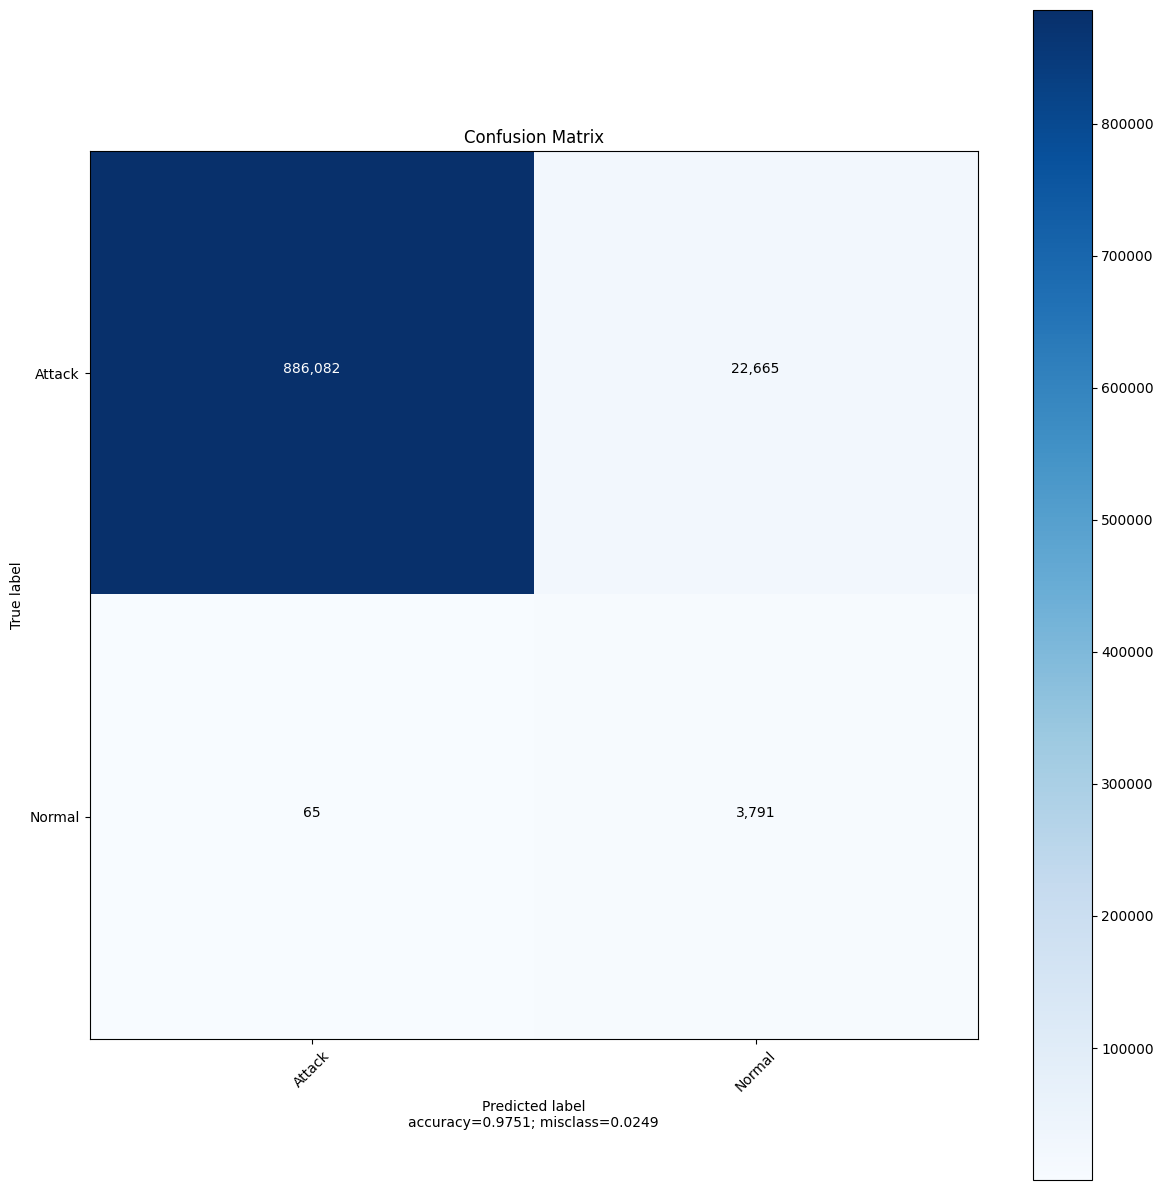

In [65]:
plot_confusion_matrix(cm = confusion_matrix(actual, test_pred), 
                      normalize    = False,
                      target_names = np.unique(actual),
                      title        = "Confusion Matrix")

In [66]:
print(classification_report(actual, test_pred, digits=4))

              precision    recall  f1-score   support

      Attack     0.9999    0.9751    0.9873    908747
      Normal     0.1433    0.9831    0.2501      3856

    accuracy                         0.9751    912603
   macro avg     0.5716    0.9791    0.6187    912603
weighted avg     0.9963    0.9751    0.9842    912603



In [67]:
print(residual)

True


In [68]:
# th.save(model.state_dict(), 'ton-iot.binary.pt')

In [69]:
# from sklearn.metrics import 
# print(classification_report(actual, test_pred, digits=2))